In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mymoviedb.csv', lineterminator = '\n')

In [3]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [5]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

In [6]:
df.drop(['Overview', 'Poster_Url'], axis = 1, inplace =True)

In [7]:
df.drop(['Original_Language'], axis = 1, inplace =True)

In [8]:
df.shape

(9827, 6)

In [9]:
df['Genre'].describe()

count      9827
unique     2337
top       Drama
freq        466
Name: Genre, dtype: object

In [10]:
df.dtypes

Release_Date    datetime64[ns]
Title                   object
Popularity             float64
Vote_Count               int64
Vote_Average           float64
Genre                   object
dtype: object

## Categorizing 'Vote_Average' column

#### making 4 categories - not_popular, below_avg, average, popular

In [11]:
def categorize(df, col, labels):

    edges = [df[col].describe()['min'],
            df[col].describe()['25%'],
            df[col].describe()['50%'],
            df[col].describe()['75%'],
            df[col].describe()['max']]

    df[col] = pd.cut(df[col], edges, labels = labels)
    return df

In [12]:
labels = ['not_popular', 'below_avg', 'average', 'popular']
categorize(df, 'Vote_Average', labels)

df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,2618.087,122,below_avg,Thriller
3,2021-11-24,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [13]:
df.dropna(inplace = True)

# Spliting 'Genre' into separate row

In [14]:
df['Genre'] = df['Genre'].str.split(', ')

df = df.explode(['Genre']).reset_index(drop = True)

In [15]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022-03-01,The Batman,3827.658,1151,popular,Crime
4,2022-03-01,The Batman,3827.658,1151,popular,Mystery


In [16]:
df['Genre'] = df['Genre'].astype('category')

In [17]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022-03-01,The Batman,3827.658,1151,popular,Crime
4,2022-03-01,The Batman,3827.658,1151,popular,Mystery


# **Exploratory Data Analysis**

## Most frequent genre of movies released

In [18]:
genre_freq = df['Genre'].value_counts()

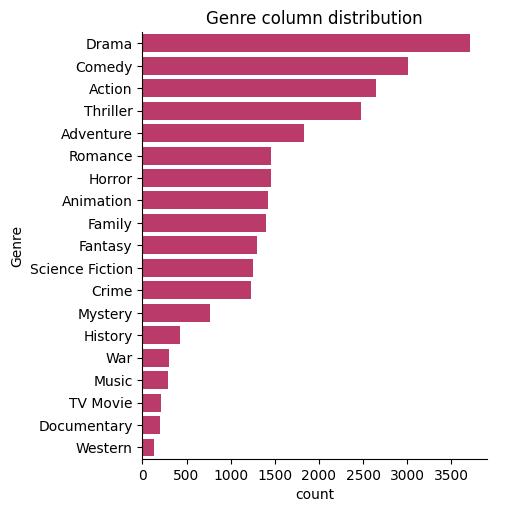

In [79]:
sns.catplot(y = 'Genre', data = df, kind = 'count',
           order = df['Genre'].value_counts().index , color = '#cf2564')
plt.title('Genre column distribution')
plt.show()

In [20]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022-03-01,The Batman,3827.658,1151,popular,Crime
4,2022-03-01,The Batman,3827.658,1151,popular,Mystery


## Highest vote in vote_average column

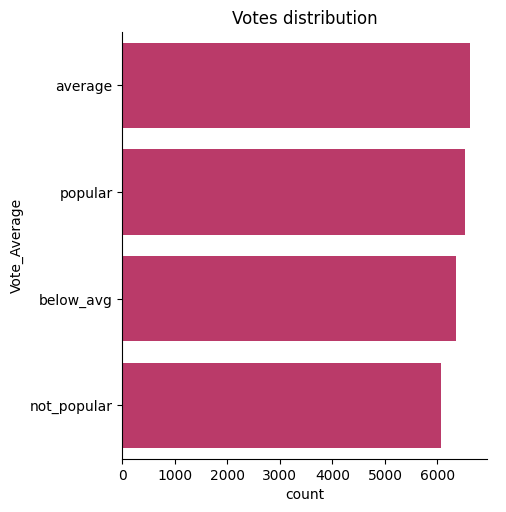

In [78]:
sns.catplot(y = 'Vote_Average', data = df, kind = 'count',
           order = df['Vote_Average'].value_counts().index , color = '#cf2564')
plt.title('Votes distribution')
plt.show()

## Movie with highest popularity and its genre

In [29]:
df.loc[df['Popularity'] == df['Popularity'].max(), ['Title', 'Genre', 'Popularity']]

,Title,Genre,Popularity
0,Spider-Man: No Way Home,Action,5083.954
1,Spider-Man: No Way Home,Adventure,5083.954
2,Spider-Man: No Way Home,Science Fiction,5083.954


## Movies with lowest popularity and its genre

In [30]:
df.loc[df['Popularity'] == df['Popularity'].min(), ['Title', 'Genre', 'Popularity']]

,Title,Genre,Popularity
25546,The United States vs. Billie Holiday,Music,13.354
25547,The United States vs. Billie Holiday,Drama,13.354
25548,The United States vs. Billie Holiday,History,13.354
25549,Threads,War,13.354
25550,Threads,Drama,13.354
25551,Threads,Science Fiction,13.354


## Year with most movies filmmed

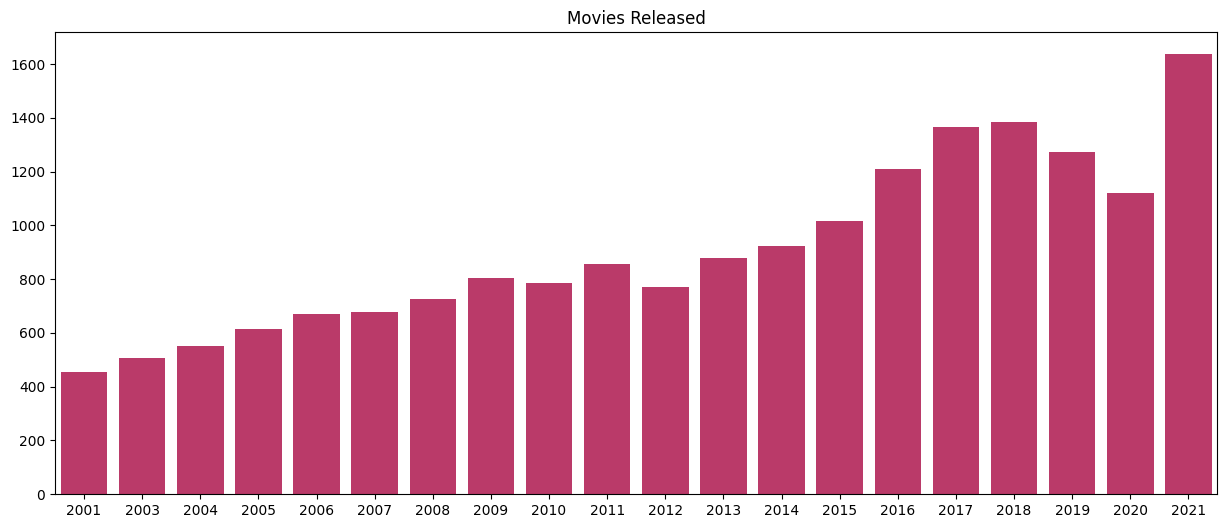

In [77]:
data = df.groupby('year')['Popularity'].count().reset_index(name = 'count').sort_values('count', ascending = False).head(20)

plt.figure(figsize= (15,6))
sns.barplot(x= 'year', data = data, y= 'count' , color = '#cf2564')
plt.title('Movies Released')
plt.xlabel('')
plt.ylabel('')
plt.show()

# Conclusion 

### Q1: What is the most frequent genre in the dataset?
#### Drama genre is the most frequent genre in our dataset and has appeared more than 14% of the times among 19 other genres.

### Q2: What genres has highest votes? 

#### we have 25.5% of our dataset with popular vote (6520 rows). Drama again gets the highest popularity among fans by being having more than 18.5% of movies popularities.

### Q3: What movie got the highest popularity? what's its genre? 

#### Spider-Man: No Way Home has the highest popularity rate in our dataset and it has genres of Action, Adventure and Sience Fiction.

### Q4: What movie got the lowest popularity? what's its genre? 

#### The united states, thread' has the highest lowest rate in our dataset and it has genres of music, drama, 'war', 'sci-fi' and history`.

### Q5: Which year has the most filmmed movies? 

#### Year 2021 has the highest filmming rate in our dataset.